In [1]:
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense, Dropout, Activation
from keras.callbacks import EarlyStopping
import pandas as pd, numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import random

test1=pd.read_csv('newemer.csv', header=None)
test2=pd.read_csv('newnor.csv', header=None)
test1["label"] = "unsafe"
test2["label"] = "safe"

Using TensorFlow backend.


In [2]:
csv=pd.concat([test1, test2])
bclass = {'safe':[1, 0], 'unsafe':[0, 1]}
y = np.empty((len(csv), 2))
for i, v in enumerate(csv['label']):
    y[i] = bclass[v]

del csv['label']
#X = csv[['delta','theta','lowAlpha','highAlpha','lowBeta','highBeta','lowGamma','midGamma','Meditation','Attention']].to_numpy()
X=csv.to_numpy()

scaler = RobustScaler()
scaler.fit(X)
X = scaler.transform(X)
#print(X_rob)
# np.mean(X_rob), np.std(X_rob)

tmp = [[x,y_tmp] for x, y_tmp in zip(X, y)]
random.shuffle(tmp)
X= [n[0] for n in tmp]
y = [n[1] for n in tmp]

X = np.asarray(X, dtype=np.float32)
y = np.asarray(y, dtype=np.float32)
print(len(X), len(y))

5674 5674


In [3]:
x_train, y_train = X[1:4800], y[1:4800]
x_test, y_test = X[4800:], y[4800:]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(4799, 10) (4799, 2) (874, 10) (874, 2)


In [4]:
model = Sequential()
"""
model.add(Convolution2D(32, 3, 3,
                        border_mode='same',
                        input_shape=X_train.shape[1:]))
                        """
model.add(Dense(512, input_shape=(10,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))
# model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(2, activation='sigmoid'))

model.compile(
    loss='binary_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

In [6]:
#모델 학습시키기
hist = model.fit(x_train, y_train, epochs=300, 
                 batch_size=128, validation_data=(x_test, y_test),verbose=2)

Train on 4799 samples, validate on 874 samples
Epoch 1/300
 - 0s - loss: 0.1056 - accuracy: 0.9625 - val_loss: 0.2056 - val_accuracy: 0.9468
Epoch 2/300
 - 0s - loss: 0.1032 - accuracy: 0.9642 - val_loss: 0.1804 - val_accuracy: 0.9502
Epoch 3/300
 - 0s - loss: 0.1034 - accuracy: 0.9624 - val_loss: 0.2188 - val_accuracy: 0.9348
Epoch 4/300
 - 0s - loss: 0.1016 - accuracy: 0.9642 - val_loss: 0.1973 - val_accuracy: 0.9445
Epoch 5/300
 - 0s - loss: 0.1016 - accuracy: 0.9641 - val_loss: 0.2102 - val_accuracy: 0.9462
Epoch 6/300
 - 0s - loss: 0.1005 - accuracy: 0.9634 - val_loss: 0.2289 - val_accuracy: 0.9394
Epoch 7/300
 - 0s - loss: 0.0997 - accuracy: 0.9661 - val_loss: 0.1878 - val_accuracy: 0.9399
Epoch 8/300
 - 0s - loss: 0.0981 - accuracy: 0.9662 - val_loss: 0.1939 - val_accuracy: 0.9439
Epoch 9/300
 - 0s - loss: 0.1000 - accuracy: 0.9637 - val_loss: 0.2120 - val_accuracy: 0.9422
Epoch 10/300
 - 0s - loss: 0.0967 - accuracy: 0.9658 - val_loss: 0.2044 - val_accuracy: 0.9439
Epoch 11/300

Epoch 87/300
 - 0s - loss: 0.0447 - accuracy: 0.9843 - val_loss: 0.3574 - val_accuracy: 0.9388
Epoch 88/300
 - 0s - loss: 0.0427 - accuracy: 0.9852 - val_loss: 0.3479 - val_accuracy: 0.9405
Epoch 89/300
 - 0s - loss: 0.0417 - accuracy: 0.9854 - val_loss: 0.3618 - val_accuracy: 0.9308
Epoch 90/300
 - 0s - loss: 0.0414 - accuracy: 0.9856 - val_loss: 0.3198 - val_accuracy: 0.9451
Epoch 91/300
 - 0s - loss: 0.0504 - accuracy: 0.9820 - val_loss: 0.3671 - val_accuracy: 0.9376
Epoch 92/300
 - 0s - loss: 0.0393 - accuracy: 0.9855 - val_loss: 0.3833 - val_accuracy: 0.9314
Epoch 93/300
 - 0s - loss: 0.0405 - accuracy: 0.9865 - val_loss: 0.3802 - val_accuracy: 0.9439
Epoch 94/300
 - 0s - loss: 0.0412 - accuracy: 0.9857 - val_loss: 0.3976 - val_accuracy: 0.9348
Epoch 95/300
 - 0s - loss: 0.0415 - accuracy: 0.9868 - val_loss: 0.3682 - val_accuracy: 0.9416
Epoch 96/300
 - 0s - loss: 0.0383 - accuracy: 0.9876 - val_loss: 0.4135 - val_accuracy: 0.9371
Epoch 97/300
 - 0s - loss: 0.0384 - accuracy: 0.98

Epoch 173/300
 - 0s - loss: 0.0248 - accuracy: 0.9929 - val_loss: 0.4710 - val_accuracy: 0.9365
Epoch 174/300
 - 0s - loss: 0.0245 - accuracy: 0.9919 - val_loss: 0.4309 - val_accuracy: 0.9468
Epoch 175/300
 - 0s - loss: 0.0232 - accuracy: 0.9928 - val_loss: 0.5088 - val_accuracy: 0.9405
Epoch 176/300
 - 0s - loss: 0.0223 - accuracy: 0.9947 - val_loss: 0.5570 - val_accuracy: 0.9314
Epoch 177/300
 - 0s - loss: 0.0185 - accuracy: 0.9937 - val_loss: 0.4871 - val_accuracy: 0.9411
Epoch 178/300
 - 0s - loss: 0.0228 - accuracy: 0.9928 - val_loss: 0.4280 - val_accuracy: 0.9348
Epoch 179/300
 - 0s - loss: 0.0220 - accuracy: 0.9925 - val_loss: 0.4862 - val_accuracy: 0.9411
Epoch 180/300
 - 0s - loss: 0.0205 - accuracy: 0.9927 - val_loss: 0.4935 - val_accuracy: 0.9399
Epoch 181/300
 - 0s - loss: 0.0210 - accuracy: 0.9927 - val_loss: 0.5118 - val_accuracy: 0.9331
Epoch 182/300
 - 0s - loss: 0.0225 - accuracy: 0.9932 - val_loss: 0.4458 - val_accuracy: 0.9411
Epoch 183/300
 - 0s - loss: 0.0192 - acc

Epoch 259/300
 - 0s - loss: 0.0131 - accuracy: 0.9965 - val_loss: 0.5521 - val_accuracy: 0.9348
Epoch 260/300
 - 0s - loss: 0.0141 - accuracy: 0.9962 - val_loss: 0.5745 - val_accuracy: 0.9376
Epoch 261/300
 - 0s - loss: 0.0232 - accuracy: 0.9946 - val_loss: 0.5527 - val_accuracy: 0.9325
Epoch 262/300
 - 0s - loss: 0.0172 - accuracy: 0.9946 - val_loss: 0.6164 - val_accuracy: 0.9325
Epoch 263/300
 - 0s - loss: 0.0165 - accuracy: 0.9950 - val_loss: 0.6372 - val_accuracy: 0.9228
Epoch 264/300
 - 0s - loss: 0.0179 - accuracy: 0.9953 - val_loss: 0.6700 - val_accuracy: 0.9342
Epoch 265/300
 - 0s - loss: 0.0201 - accuracy: 0.9935 - val_loss: 0.5023 - val_accuracy: 0.9342
Epoch 266/300
 - 0s - loss: 0.0185 - accuracy: 0.9942 - val_loss: 0.5396 - val_accuracy: 0.9348
Epoch 267/300
 - 0s - loss: 0.0163 - accuracy: 0.9955 - val_loss: 0.5695 - val_accuracy: 0.9308
Epoch 268/300
 - 0s - loss: 0.0190 - accuracy: 0.9955 - val_loss: 0.5508 - val_accuracy: 0.9296
Epoch 269/300
 - 0s - loss: 0.0153 - acc

In [7]:
import matplotlib.pyplot as plt
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')

plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.draw()
# fig1 = plt.gcf()
plt.show()
# fig1.savefig('fig1.png', dpi=100)

<Figure size 640x480 with 1 Axes>

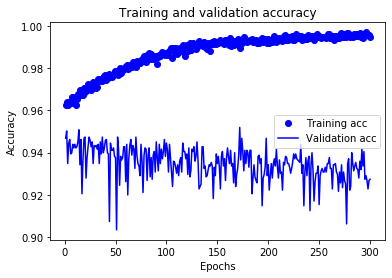

In [8]:
plt.clf()   # 그래프를 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

fig2 = plt.gcf()

plt.draw()

In [14]:
dat=pd.read_csv('normal_train.csv')

# dat.drop(['Unnamed: 0'], axis=1, inplace=True)
# print(dat)
X = dat.to_numpy()
X = scaler.transform(X)
xhat = X[0:1]
res = {
    "total":len(X),
    "safe":0,
    "emergency":0
}
for i in range(0,len(X)):
    yhat = model.predict_classes(X[i:i+1])
    if yhat == [0]:
        res["safe"]+=1
    else :
        res["emergency"]+=1


In [19]:
print(res)
print("safe: "+str(float(res["safe"])/float(res["total"])*100)+"%")

{'total': 6303, 'safe': 5929, 'emergency': 374}
safe: 94.06631762652705%


In [33]:
model_json = model.to_json()
with open("model.json", "w") as json_file : 
    json_file.write(model_json)

In [46]:
model.save("eeg_model2.h5")

In [47]:
from sklearn.externals import joblib 
# 객체를 pickled binary file 형태로 저장한다 
file_name = 'robust_scaler.pkl' 
joblib.dump(scaler, file_name) 

C:\Users\HAYOUNG LEE\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['robust_scaler.pkl']